In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fashion_train = pd.read_csv(r"C:\Users\97254\Desktop\fashion-mnist_train.csv")

In [2]:
# Models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Data Splitting
from sklearn.model_selection import train_test_split

# Scailing
from sklearn.preprocessing import StandardScaler

In [5]:
fashion_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = fashion_train.drop('label', axis=1)
y = fashion_train.label

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Each row is a representation of an image.<br>
We will convert the data into scaled data and we will show a single image from the data.<br>
Of course the pictures are in black and white as we have 784 features, and we do not have three values for each feature that will express the colors.

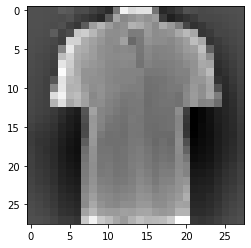

In [12]:
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

scaled_arr = scaled.to_numpy()
img=scaled_arr[24074].reshape(28,28)
plt.imshow(img,plt.cm.gray)
plt.show()

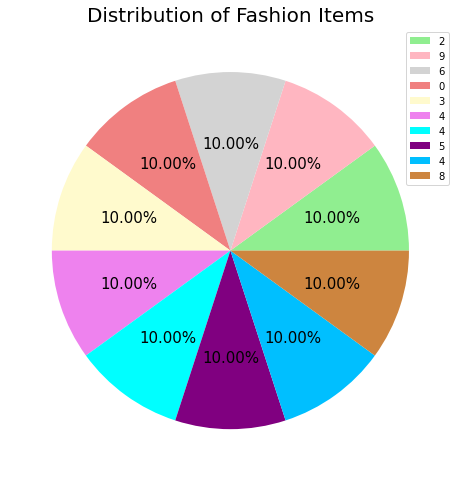

In [17]:
plt.subplots(figsize=(8, 9))
plt.pie(fashion_train['label'].value_counts(), colors = ['lightgreen', 'lightpink', 'lightgrey', 'lightcoral', 'lemonChiffon', 'violet', 'cyan', 'purple', 'deepskyblue', 'peru'], autopct = '%.2f%%' , textprops={"fontsize":15})
plt.title('Distribution of Fashion Items' , fontdict = {'fontsize' : 20})

plt.show()

As we can see, each item has the same amount of instances which means that the data is well divided.